In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv
Saving FootballersMarketValue.ipynb to FootballersMarketValue.ipynb


In [3]:
import pandas as pd
import numpy as np

# Load dataset
footballers = pd.read_csv("data.csv")

# Drop rows where target is missing
footballers_cleaned = footballers.dropna(subset=['value_euro']).copy()

# Drop string and irrelevant columns if they exist
drop_cols = [
    'name', 'full_name', 'birth_date', 'national_team',
    'national_rating', 'national_team_position',
    'national_jersey_number'
]
footballers_cleaned.drop(columns=[col for col in drop_cols if col in footballers_cleaned.columns], inplace=True)


In [4]:
# Target column
footballers_labels = footballers_cleaned['value_euro'].copy()

# Feature columns
footballers_features = footballers_cleaned.drop('value_euro', axis=1)


In [5]:
# Drop 'release_clause_euro' and 'wage_euro' from the original features DataFrame
footballers_features = footballers_features.drop(['release_clause_euro', 'wage_euro'], axis=1)


In [6]:
# One-hot encode categorical columns
footballers_features = pd.get_dummies(footballers_features)

# Reset index for consistency
footballers_features.reset_index(drop=True, inplace=True)
footballers_labels.reset_index(drop=True, inplace=True)


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply pipeline
footballers_features_prepared = pipeline.fit_transform(footballers_features)


In [8]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(footballers_features_prepared, footballers_labels)

print("Model trained successfully!")


Model trained successfully!


In [9]:
from sklearn.metrics import mean_squared_error

# Predict and evaluate
predictions = model.predict(footballers_features_prepared)
mse = mean_squared_error(footballers_labels, predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error on training data: {rmse:.2f}")


Root Mean Squared Error on training data: 3242040.69


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    footballers_features_prepared, footballers_labels,
    test_size=0.2, random_state=42
)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse:.2f}")


Test RMSE: 3611912.44


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse:.2f}")


Test RMSE: 977095.54


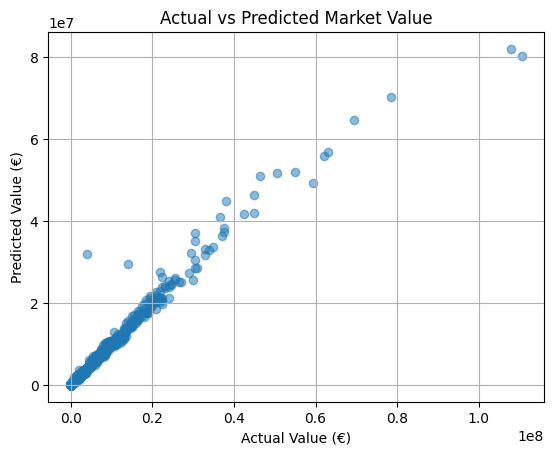

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Value (€)")
plt.ylabel("Predicted Value (€)")
plt.title("Actual vs Predicted Market Value")
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")


R² Score: 0.9712


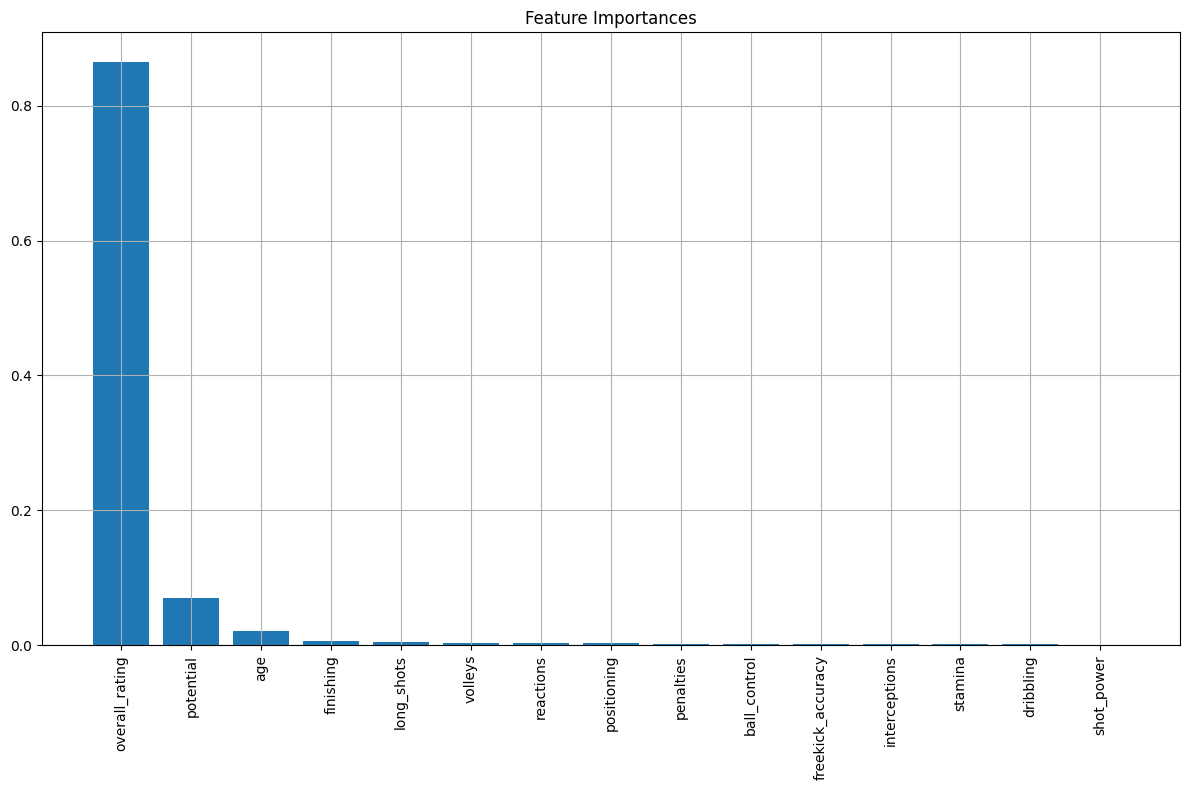

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Use your feature dataframe to get column names
feature_names = footballers_features.columns

# Get feature importances from the trained model
importances = model.feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(15), importances[indices[:15]], align='center')
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()
